In [96]:
import pandas as pd #for data processing
import numpy as np # for numeric operations
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # fro visualization
import warnings 

warnings.filterwarnings("ignore") #for ignoring warnings if we write any code

In [97]:
## global variables

In [98]:
## script functions - will be pasting all the functions wheverver we will be forming as per use in firther
def load_data(path):
    dataset = pd.read_csv(path)
    return dataset

In [99]:
data = load_data("C:/Users/shashank malik/Downloads/BigBasket.csv")
data.shape

(27555, 10)

In [100]:
data.head() # reading data/explore data

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [101]:
# extracting information/schema
data.info() # for any null values and what is the type of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


In [102]:
# statistical approach
data.describe()

,index,sale_price,market_price,rating
count,27555.00000,27555.000000,27555.000000,18929.000000
mean,13778.00000,322.514808,382.056664,3.943410
std,7954.58767,486.263116,581.730717,0.739063
min,1.00000,2.450000,3.000000,1.000000
25%,6889.50000,95.000000,100.000000,3.700000
50%,13778.00000,190.000000,220.000000,4.100000
75%,20666.50000,359.000000,425.000000,4.300000
max,27555.00000,12500.000000,12500.000000,5.000000


In [103]:
# checking for null value
data.isnull().sum() #first check the %age of missing values- data.isnull().sum()/data.shape[0]*100
                    #fill categorical column with mode
                    #fill numerical column  with median(prefered) and mean(not prefered) coz median has no efect of outliars

index              0
product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
dtype: int64

In [104]:
data['product'].unique()

array(['Garlic Oil - Vegetarian Capsule 500 mg', 'Water Bottle - Orange',
       'Brass Angle Deep - Plain, No.2', ...,
       'Wottagirl! Perfume Spray - Heaven, Classic',
       'Peri-Peri Sweet Potato Chips', 'Green Tea - Pure Original'],
      dtype=object)

In [105]:
data['product'].mode()

0    Turmeric Powder/Arisina Pudi
Name: product, dtype: object

In [106]:
#dropping missing values in product column
data = data[~data['product'].isnull()].copy()

In [107]:
data.isnull().sum()

index              0
product            0
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
dtype: int64

In [108]:
#dropping missing values from brand column
data = data[~data['brand'].isnull()].copy()

In [109]:
data.isnull().sum()

index              0
product            0
category           0
sub_category       0
brand              0
sale_price         0
market_price       0
type               0
rating          8625
description      114
dtype: int64

In [110]:
#filling missing values in ratings column
data['rating'].unique()

array([4.1, 2.3, 3.4, 3.7, 4.4, 3.3, 3.6, 4. , 3.5, 4.3, 2.2, 5. , 3.8,
       4.2, 4.9, 3.9, 1.5, 2.9, 2.6, 3. , 4.5, nan, 1. , 4.6, 4.8, 3.1,
       2. , 1.8, 2.8, 3.2, 4.7, 2.5, 2.4, 2.7, 2.1, 1.7, 1.9, 1.2, 1.3,
       1.4, 1.6])

In [111]:
print("mode is {}".format(data['rating'].mode()))
print("median is {}".format(data['rating'].median()))

mode is 0    4.2
Name: rating, dtype: float64
median is 4.1


In [112]:
data['rating'] = data['rating'].fillna(round(data['rating'].mean(),2))

In [113]:
data['rating'].unique()

array([4.1 , 2.3 , 3.4 , 3.7 , 4.4 , 3.3 , 3.6 , 4.  , 3.5 , 4.3 , 2.2 ,
       5.  , 3.8 , 4.2 , 4.9 , 3.9 , 1.5 , 2.9 , 2.6 , 3.  , 4.5 , 3.94,
       1.  , 4.6 , 4.8 , 3.1 , 2.  , 1.8 , 2.8 , 3.2 , 4.7 , 2.5 , 2.4 ,
       2.7 , 2.1 , 1.7 , 1.9 , 1.2 , 1.3 , 1.4 , 1.6 ])

In [114]:
data.isnull().sum()

index             0
product           0
category          0
sub_category      0
brand             0
sale_price        0
market_price      0
type              0
rating            0
description     114
dtype: int64

In [115]:
#filling missing values in descriotion column
data['description'].unique()

array(['This Product contains Garlic Oil that is known to help proper digestion, maintain proper cholesterol levels, support cardiovascular and also build immunity.  For Beauty tips, tricks & more visit https://bigbasket.blog/',
       'Each product is microwave safe (without lid), refrigerator safe, dishwasher safe and can also be used for re-heating food and not for cooking. All containers come with airtight lids and a wide variety of attractive colours. Stack these stylish and colourful containers in your kitchen with ease and for a look-good factor.',
       'A perfect gift for all occasions, be it your mother, sister, in-laws, boss or your friends, this beautiful designer piece wherever placed, is sure to beautify the surroundings Traditional design This type diya has been used for Diwali and All other Festivals for centuries. Sturdy and easy to carry The feet keep it balanced to ensure safety. Wonderful Oil Lamp made in Brass also called as Jyoti. This is a handcrafted piece of I

In [116]:
data.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [117]:
#droping description column
data.drop('description',axis=1,inplace=True)

In [118]:
data.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4


In [119]:
data.shape

(27553, 9)

In [120]:
data.isnull().sum()

index           0
product         0
category        0
sub_category    0
brand           0
sale_price      0
market_price    0
type            0
rating          0
dtype: int64

In [121]:
#now data is all prepared 

# Exploratory Data Analysis

# Univariate

-numerical

-categorical

# Bivariate
-numerical vs numerical

-categorical vs categorical

-numerical vs categorical

# Multivariate
more than 2 columns are used for analysis -very rarely used 

In [122]:
data.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4


In [138]:
# UNIVARIATE ANALYSIS
#category to numeric 
#sns.barplot(data=data,y='product') #numeric value honi cahiye
dummy = data['product'].value_counts()

In [139]:
dummy #value count karke category ko bar plot karsakthe hain 

Turmeric Powder/Arisina Pudi                                     26
Extra Virgin Olive Oil                                           15
Cow Ghee/Tuppa                                                   14
Soft Drink                                                       12
Colorsilk Hair Colour With Keratin                               12
                                                                 ..
Pepper & Herb Salami Chicken                                      1
Nutmeg Powder                                                     1
Disney Mickey Mouse Plastic Kids Sipper Bottle - Coolest Dude     1
Chocolates-Roasted Peanut Chocolate                               1
Green Tea - Pure Original                                         1
Name: product, Length: 23539, dtype: int64

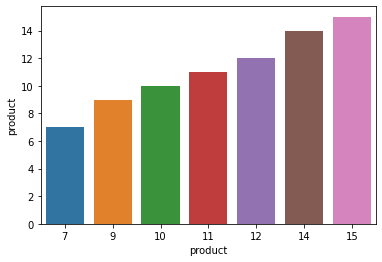

In [140]:
sns.barplot(data=dummy,y=dummy,x=dummy.values)
plt.show()

In [143]:
#2nd category to numeric 
dummy2=data['brand'].value_counts()
dummy2

Fresho              638
bb Royal            539
BB Home             428
DP                  250
Fresho Signature    171
                   ... 
Wellastrate           1
Clean & Fresh         1
Lal                   1
Glint                 1
Baron De Bercy        1
Name: brand, Length: 2313, dtype: int64

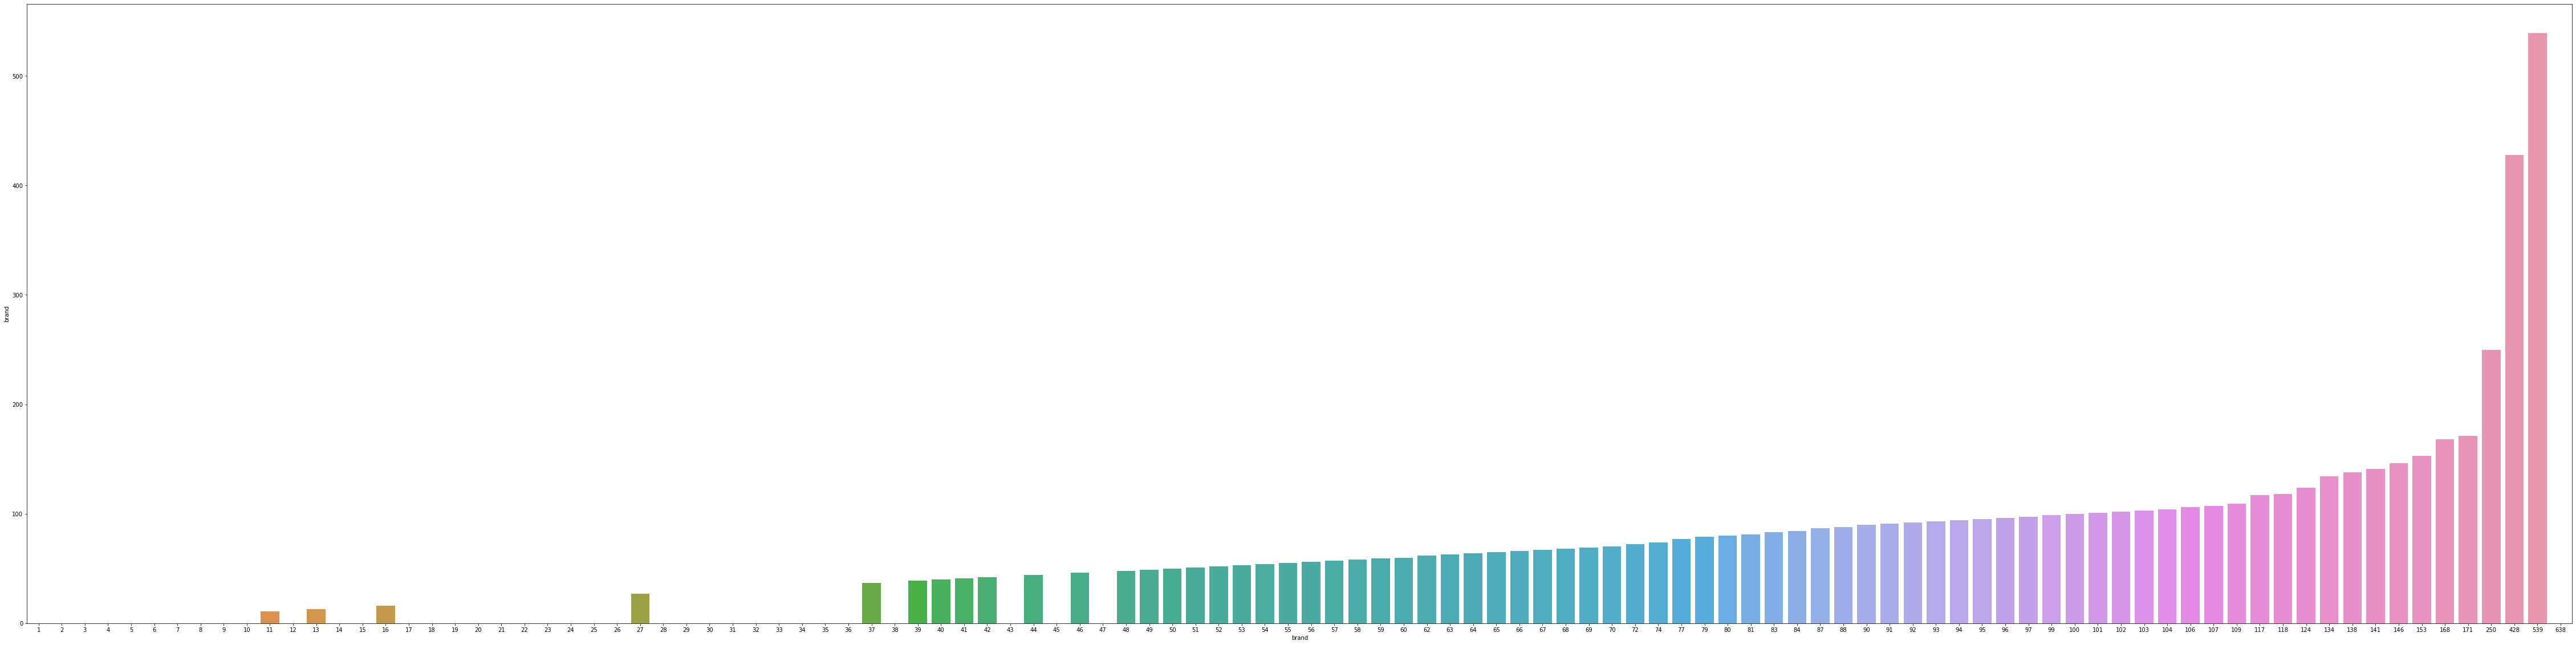

In [151]:
plt.figure(figsize=(80,20))
sns.barplot(data=dummy2,x=dummy2.index,y=dummy2.values)
plt.show()

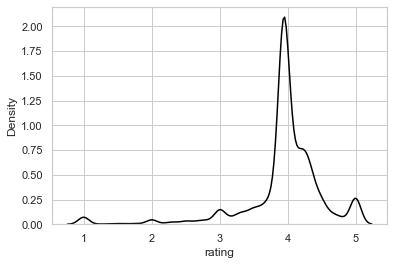

In [188]:
#univariate analysis
#numeric
sns.set_theme(style='whitegrid')
sns.kdeplot(data=data,x='rating',color='black')

plt.show()

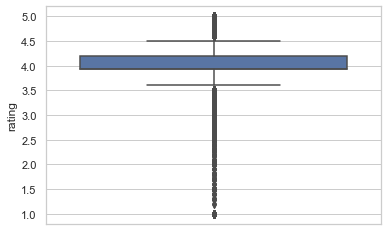

In [158]:
sns.set_theme(style='whitegrid')
sns.boxplot(data=data,y='rating')
plt.show()

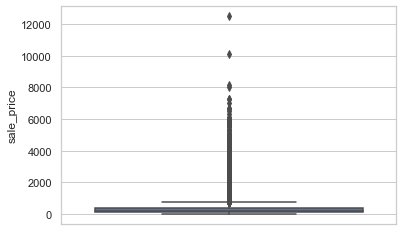

In [160]:
sns.set_theme(style='whitegrid')
sns.boxplot(data=data,y='sale_price')
plt.show()

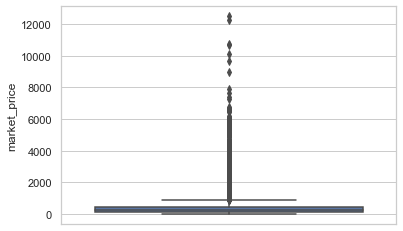

In [161]:
sns.set_theme(style='whitegrid')
sns.boxplot(data=data,y='market_price')
plt.show()

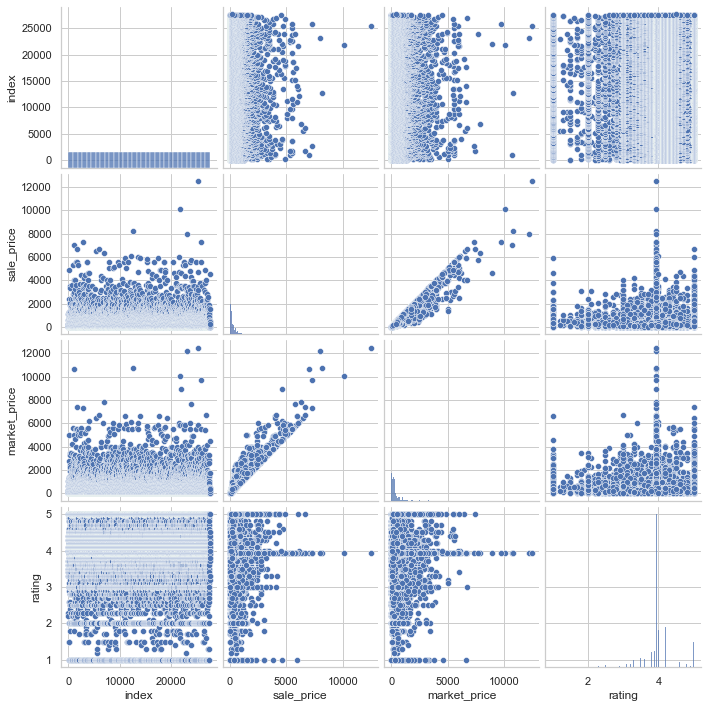

In [162]:
#for bivariate analysis
sns.pairplot(data)
plt.show()

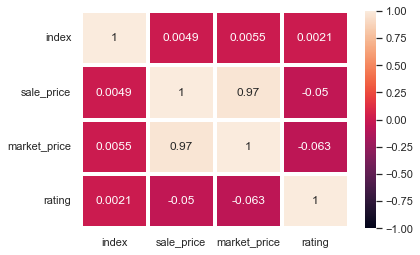

In [164]:
corr=data.corr()
sns.heatmap(corr,vmin=-1,vmax=1,annot=True,linewidth=4)
plt.show()

hence, sale_price and market_price have positive linear coorelation 


In [168]:
# numerical and categorical analysis
data.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4


In [ ]:
#def profit(salesP,marketP):
    profit = 

In [183]:
dummy3 = data['category'].value_counts()
dummy3

Beauty & Hygiene            7867
Gourmet & World Food        4690
Kitchen, Garden & Pets      3580
Snacks & Branded Foods      2814
Foodgrains, Oil & Masala    2676
Cleaning & Household        2674
Beverages                    884
Bakery, Cakes & Dairy        851
Baby Care                    610
Fruits & Vegetables          557
Eggs, Meat & Fish            350
Name: category, dtype: int64

<AxesSubplot:xlabel='category'>

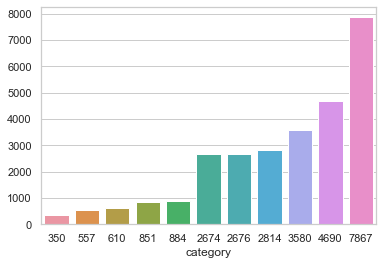

In [186]:
sns.barplot(data=dummy3,x=dummy3.index,y=dummy3.values)

# EDA REPORT

sales price and market price is highly positively correlated 


# modelling

In [189]:
data

,index,product,category,sub_category,brand,sale_price,market_price,type,rating
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4.1
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2.3
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3.4
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",3.7
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4.4
...,...,...,...,...,...,...,...,...,...
27550,27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9
27551,27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0
27552,27553,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.8
27553,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2


In [190]:
data.drop('index',axis=1,inplace = True)

In [191]:
data

,product,category,sub_category,brand,sale_price,market_price,type,rating
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4.1
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2.3
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3.4
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",3.7
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4.4
...,...,...,...,...,...,...,...,...
27550,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9
27551,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0
27552,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.8
27553,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2


In [214]:
#for linear regression
x=data[['product','category','sub_category','brand','sale_price','market_price','type']]
y=data['rating']
print(x.shape,y.shape)

(27553, 7) (27553,)


In [215]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)

In [216]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(19287, 7) (19287,) (8266, 7) (8266,)


In [217]:
x_train

,product,category,sub_category,brand,sale_price,market_price,type
14675,Fritts - Cream & Onion,Snacks & Branded Foods,Snacks & Namkeen,Crax,15.0,15.0,Chips & Corn Snacks
14989,Frozen Basa Fish - Fillets,"Eggs, Meat & Fish",Fish & Seafood,Big Sams,350.0,350.0,Frozen Fish & Seafood
21185,D-Tan Scrub For Men,Beauty & Hygiene,Skin Care,QRAA,263.0,350.0,Face & Body
16604,Fresh Cream,"Bakery, Cakes & Dairy",Dairy,Heritage,47.0,50.0,"Paneer, Tofu & Cream"
16147,Packaged Drinking Water,Beverages,Water,Aquafina,240.0,240.0,Packaged Water
...,...,...,...,...,...,...,...
12120,Immune Warrior Immunity Booster Green Tea,Gourmet & World Food,Drinks & Beverages,TGL Co.,420.0,600.0,Gourmet Tea & Tea Bags
24425,Vanilla Almond Cake,"Bakery, Cakes & Dairy",Cakes & Pastries,The Baker's Dozen,139.0,139.0,Tea Cakes & Slice Cakes
14148,Cinnamon/Chakke,"Foodgrains, Oil & Masala",Masalas & Spices,Grocery Farm,100.0,100.0,Whole Spices
23322,"Deodorant Roll On, Silver Protect, Antibacteri...",Beauty & Hygiene,Fragrances & Deos,Nivea Men,181.3,185.0,Men's Deodorants


In [225]:
#dummy/one hot encoding

x_train = pd.get_dummies(x_train, drop_first = True)


x_test = x_test.reindex(columns = x_train.columns, fill_value=0) #with this we wont loose any column
 
x_test



x_train.shape,x_test.shape

((19287, 19804), (8266, 19804))

In [228]:
# normalize
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train),columns = x_train.columns)

x_test_scaled = pd.DataFrame(scaler.transform(x_test),columns = x_train.columns)

x_train_scaled.shape,x_test_scaled.shape

((19287, 19804), (8266, 19804))

In [229]:
x_train_scaled.isnull().sum()

sale_price                               0
market_price                             0
product_& Moms - Sandal Soap             0
product_& Moms Bathing Soap - Jasmine    0
product_& Moms Bathing Soap - Tulsi      0
                                        ..
type_Wet Wipe, Pocket Tissues            0
type_Whole Spices                        0
type_Wine & Rice Vinegar                 0
type_Women's Deodorants                  0
type_Yogurt & Shrikhand                  0
Length: 19804, dtype: int64

In [230]:
x_test.isnull().sum()

sale_price                               0
market_price                             0
product_& Moms - Sandal Soap             0
product_& Moms Bathing Soap - Jasmine    0
product_& Moms Bathing Soap - Tulsi      0
                                        ..
type_Wet Wipe, Pocket Tissues            0
type_Whole Spices                        0
type_Wine & Rice Vinegar                 0
type_Women's Deodorants                  0
type_Yogurt & Shrikhand                  0
Length: 19804, dtype: int64

In [235]:
data['sale_price'] = data['sale_price'].astype(np.uint8)
data['market_price'] = data['market_price'].astype(np.uint8)


In [237]:
# lets fit the regression line 
import statsmodels.api as sm

x_train_scaled_sm = sm.add_constant(x_train_scaled)

lr_scaled = sm.OLS(y_train, x_train_scaled_sm).fit()


MemoryError: Unable to allocate 2.85 GiB for an array with shape (19804, 19287) and data type float64